In [1]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [51]:
df = pd.read_csv('/content/sample_data/NHANES_age_prediction.csv')
df_graph = pd.read_csv('/content/sample_data/NHANES_age_prediction.csv')

In [52]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [53]:
# Определяем числовые столбцы, исключая BMXBMI
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols = numerical_cols.drop('BMXBMI')

# Применяем StandardScaler к оставшимся числовым столбцам
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Выводим результат
print("Нормализованные данные:")
display(df.head())

Нормализованные данные:


,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,-1.755679,Adult,0.952979,0.977428,0.444672,35.7,0.584085,-0.087553,0.744323,0.316487
1,-1.754310,Adult,-0.783849,0.977428,0.444672,20.3,-0.590024,-0.087553,-0.743427,-0.821762
2,-1.751571,Adult,-1.280085,-1.023094,0.444672,23.2,-0.590024,-0.087553,-0.998470,-0.586084
3,-1.751228,Adult,-0.486107,-1.023094,0.444672,28.9,0.248625,-0.087553,-0.658413,0.444103
4,-1.750201,Adult,-0.188365,0.977428,-2.062661,35.9,0.192715,-0.087553,-0.722174,-0.094147


In [54]:
categorical_cols = df.select_dtypes(include=[object]).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Данные с заменой категориальных значений:")
display(df.head())

Данные с заменой категориальных значений:


,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,-1.755679,0,0.952979,0.977428,0.444672,35.7,0.584085,-0.087553,0.744323,0.316487
1,-1.754310,0,-0.783849,0.977428,0.444672,20.3,-0.590024,-0.087553,-0.743427,-0.821762
2,-1.751571,0,-1.280085,-1.023094,0.444672,23.2,-0.590024,-0.087553,-0.998470,-0.586084
3,-1.751228,0,-0.486107,-1.023094,0.444672,28.9,0.248625,-0.087553,-0.658413,0.444103
4,-1.750201,0,-0.188365,0.977428,-2.062661,35.9,0.192715,-0.087553,-0.722174,-0.094147


In [55]:
# Функция для числовой категоризации ИМТ
def categorize_bmi(bmi):
    if bmi <= 16:
        return 0  # выраженный дефицит массы
    elif 16 < bmi <= 23:
        return 0  # выраженный дефицит массы
    elif 23 < bmi <= 32:
        return 1  # нормальный вес
    elif bmi > 32:
        return 2  # ожирение 3 степени (морбидное)
    else:
        return -1  # нет данных

# Применение функции к столбцу BMXBMI и добавление нового столбца
df['BMI_Category'] = df['BMXBMI'].apply(categorize_bmi)

# Просмотр первых строк для проверки
df[['BMXBMI', 'BMI_Category']].head()


,BMXBMI,BMI_Category
0,35.7,2
1,20.3,0
2,23.2,1
3,28.9,1
4,35.9,2


In [56]:
display(df.head())

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,BMI_Category
0,-1.755679,0,0.952979,0.977428,0.444672,35.7,0.584085,-0.087553,0.744323,0.316487,2
1,-1.754310,0,-0.783849,0.977428,0.444672,20.3,-0.590024,-0.087553,-0.743427,-0.821762,0
2,-1.751571,0,-1.280085,-1.023094,0.444672,23.2,-0.590024,-0.087553,-0.998470,-0.586084,1
3,-1.751228,0,-0.486107,-1.023094,0.444672,28.9,0.248625,-0.087553,-0.658413,0.444103,1
4,-1.750201,0,-0.188365,0.977428,-2.062661,35.9,0.192715,-0.087553,-0.722174,-0.094147,2


In [61]:
X = df.drop(['BMXBMI', 'BMI_Category', 'SEQN'], axis=1)
y = df['BMI_Category']

In [58]:
X

,RIDAGEYR,RIAGENDR,PAQ605,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0.952979,0.977428,0.444672,0.584085,-0.087553,0.744323,0.316487
1,-0.783849,0.977428,0.444672,-0.590024,-0.087553,-0.743427,-0.821762
2,-1.280085,-1.023094,0.444672,-0.590024,-0.087553,-0.998470,-0.586084
3,-0.486107,-1.023094,0.444672,0.248625,-0.087553,-0.658413,0.444103
4,-0.188365,0.977428,-2.062661,0.192715,-0.087553,-0.722174,-0.094147
...,...,...,...,...,...,...,...
2273,-0.188365,0.977428,0.444672,0.024985,-0.087553,-0.892202,-0.545947
2274,0.952979,-1.023094,0.444672,-0.366384,-0.087553,1.977030,0.121976
2275,-0.386860,-1.023094,0.444672,0.192715,-0.087553,0.191730,0.985440
2276,0.903355,0.977428,0.444672,-0.534114,-0.087553,-0.148327,-0.704438


In [ ]:
# from sklearn.model_selection import train_test_split
# import scipy.stats as stats

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# t_test_result = stats.ttest_ind(a=y_train, b=y_test)

# print(t_test_result)


TtestResult(statistic=1.1312541150880278, pvalue=0.25806733300009144, df=2276.0)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)



In [63]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=7, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.636649 (0.022034)
LDA: 0.637201 (0.029231)
KNN: 0.593880 (0.035881)
CART: 0.526902 (0.021871)
NB: 0.487361 (0.022639)
SVC: 0.626780 (0.020440)


In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)

svc_pred_res = svc_model.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_pred_res)

print(f'SVC accuracy: {svc_accuracy}')


SVC accuracy: 0.6403508771929824


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


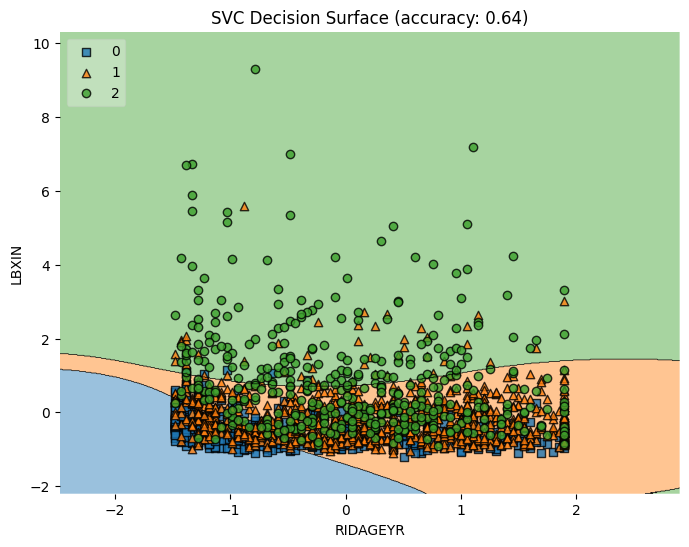

In [49]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Для визуализации выберем два признака
X_2d = X_train[['RIDAGEYR', 'LBXIN']].values
y_2d = y_train.values

# Инициализация и обучение модели SVC с оптимизированными параметрами (или gamma='auto')
svc_model = SVC(gamma='auto')
svc_model.fit(X_2d, y_2d)

# Вычисление точности
svc_pred_res = svc_model.predict(X_test[['RIDAGEYR', 'LBXIN']])
svc_accuracy = accuracy_score(y_test, svc_pred_res)

# Визуализация областей решений
plt.figure(figsize=(8, 6))
plt.title(f'SVC Decision Surface (accuracy: {svc_accuracy:.2f})')
plot_decision_regions(X=X_2d, y=y_2d, clf=svc_model, legend=2)

plt.xlabel('RIDAGEYR')
plt.ylabel('LBXIN')
plt.show()


In [64]:
from sklearn import metrics
import numpy as np

accuracy = metrics.accuracy_score(y_test, svc_pred_res)
print(f'Accuracy: {round(accuracy, 2)}')

recall = metrics.recall_score(y_test, svc_pred_res, average="weighted")
precision = metrics.precision_score(y_test, svc_pred_res, average="weighted")
print("Recall (полнота для всех классов):", round(recall, 2))
print("Precision (точность для всех классов):", round(precision, 2))

print("Classification Report:")
print(metrics.classification_report(y_test, svc_pred_res, target_names=[str(i) for i in np.unique(y_test)]))


Accuracy: 0.64
Recall (полнота для всех классов): 0.64
Precision (точность для всех классов): 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.44      0.56       121
           1       0.61      0.86      0.72       235
           2       0.67      0.37      0.48       100

    accuracy                           0.64       456
   macro avg       0.68      0.56      0.58       456
weighted avg       0.67      0.64      0.62       456

